##Here we analyse our rice_yield dataset using KMeans clustering



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from seaborn import set_style
from pandas.plotting import scatter_matrix
import os

set_style("whitegrid")

from sklearn.cluster import KMeans


In [6]:
rice_data = pd.read_csv('../Final_data/rice_yield.csv')

In [7]:

X = rice_data[['maxT_grow', 'maxT_harvest']].values

#the value k=5 is suggested by the scatter plot of (maxT_growth, maxT_harvest)
kmeans = KMeans()

kmeans.fit(X)

clusters = kmeans.predict(X)


In [8]:
kmeans.cluster_centers_

array([[32.56042795, 30.66371676],
       [21.93169231, 13.60532967],
       [34.41723946, 28.05094025],
       [26.82460584, 20.16359489],
       [15.26184314,  3.83444444],
       [33.79119955, 25.10174392],
       [28.55698185, 28.53571483],
       [31.84415444, 27.64970598]])

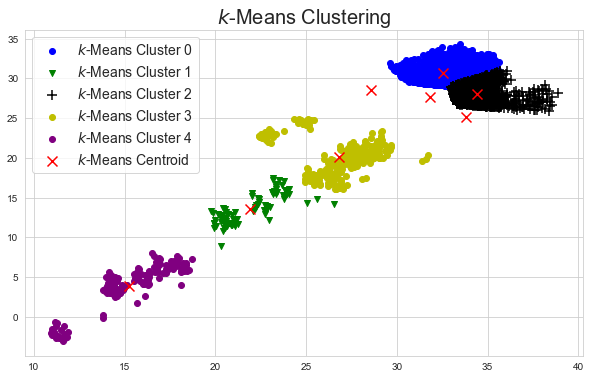

In [9]:
plt.figure(figsize=(10,6))

plt.scatter(X[clusters==0,0], X[clusters==0,1], c='b', label="$k$-Means Cluster 0")
plt.scatter(X[clusters==1,0], X[clusters==1,1], c='green', marker='v', label="$k$-Means Cluster 1")

plt.scatter(X[clusters==2,0], X[clusters==2,1], c='k', marker='+', s=100, label="$k$-Means Cluster 2")

plt.scatter(X[clusters==3,0], X[clusters==3,1], c='y',  label="$k$-Means Cluster 3")

plt.scatter(X[clusters==4,0], X[clusters==4,1], c='purple',  label="$k$-Means Cluster 4")

plt.scatter(kmeans.cluster_centers_[:,0], 
          kmeans.cluster_centers_[:,1], 
           c='r', marker='x', s=100, label='$k$-Means Centroid')

plt.legend(fontsize=14)
plt.title("$k$-Means Clustering", fontsize=20)

plt.show()

##### Updating rice_yield.csv 

by adding the columns "KM_clusterN_(maxT_growth_maxT_harvest)" that contains   the labels of the current clustering


In [10]:
rice_data = pd.DataFrame(rice_data)

rice_data["KM5_clusterN_(maxT_growth_maxT_harvest)"] = kmeans.labels_



In [11]:
rice_data = pd.DataFrame(rice_data)

rice_data["KM5_clusterN_(maxT_growth_maxT_harvest)"] = kmeans.labels_



rice_data.to_csv('../Final_data/rice_yield_KMeans.csv')

## Justification that k=5 is a reasonable choice demonstrated by the elbow method

In [12]:
inertias = []

for k in range(1,11):
    kmeans = KMeans(k)
    kmeans.fit(X)
    
   
    inertias.append(kmeans.inertia_)

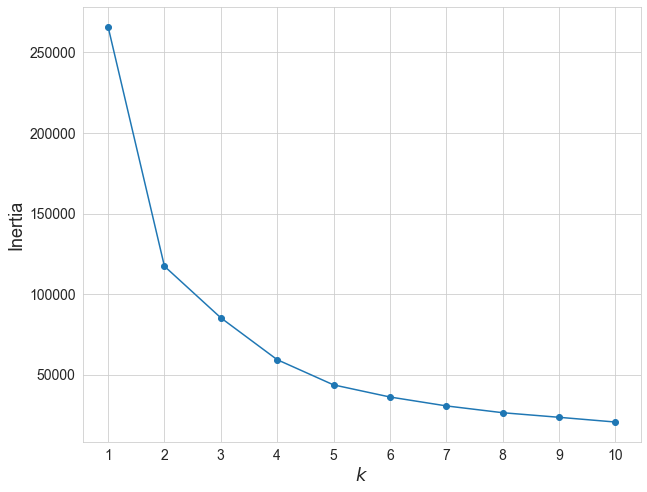

In [13]:
plt.figure(figsize=(10,8))

plt.plot(range(1,11), inertias, '-o')

plt.xlabel("$k$", fontsize=18)
plt.ylabel("Inertia", fontsize=18)

plt.xticks(range(1,11),fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## Auxiliary data frame
We work with the weather related parameters: 

`prec_grow` <br>
 `prec_harvest`<br>
 `et_grow`<br>
 `et_harvest`<br>
 `maxT_grow`<br>
 `maxT_harvest`<br>
 `minT_grow`<br>
 `minT_harvest`<br>
 `windspeed_grow`<br>
 `windspeed_harvest`<br> 
 `runoff_grow`<br>
 `runoff_harvest`<br>
 
We create an auxiliary data frame, called _Averages_, that contains averages with respect to year of the values of the above mentioned parameters
for each district

In [14]:
 # this is just a pandas series with the district numbers 
#in the same order as in the main data frame
Averages = rice_data[["Dist Name"]].drop_duplicates()

params = ["prec_grow",
                    "prec_harvest",
                    "et_grow",
                    "et_harvest",
                    "maxT_grow",
                    "maxT_harvest",
                    "minT_grow",
                    "minT_harvest",
                    "windspeed_grow",
                    "windspeed_harvest",

                    'runoff_grow', 
                    'runoff_harvest']  # The same set of parameters as in the hierarchical clusterization




#adding the mean values to the data frame averages
Districts = Averages["Dist Name"].values

for p in params:
    new_column = []
    for district in Districts:
        aux = rice_data[rice_data["Dist Name"] == district]
        p_mean = aux[p].mean()
        new_column.append(p_mean)
    # here we add a column named p_av to the Averages 
    #with mean values of corresponding parameter p w.r.t. year per district
    Averages[p+"_av"] = new_column
#Averages.to_csv('../Final_data/rice_yield_kmeans_Averaged_per_year.csv')

# The KMean clustering model with respect to the following data:
 
 `prec_grow` <br>
 `prec_harvest`<br>
 `et_grow`<br>
 `et_harvest`<br>
 `maxT_grow`<br>
 `maxT_harvest`<br>
 `minT_grow`<br>
 `minT_harvest`<br>
 `windspeed_grow`<br>
 `windspeed_harvest`<br> 
 `runoff_grow`<br>
 `runoff_harvest`<br>

In [15]:

Y = Averages.copy().drop("Dist Name", axis=1).values
#the value k=6 is suggested by the scatter plot of (maxT_growth, maxT_harvest)
Kmeans = KMeans(6)

Kmeans.fit(Y)

clusters = Kmeans.predict(Y)



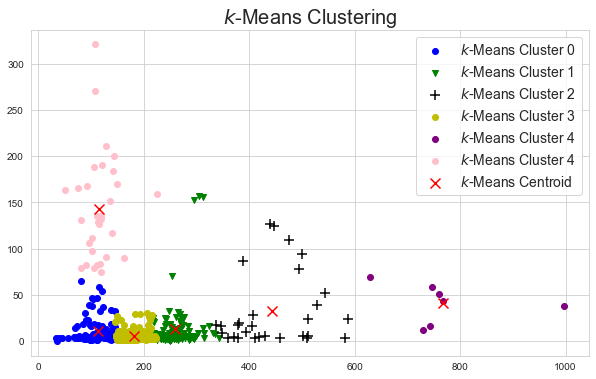

In [16]:
plt.figure(figsize=(10,6))

plt.scatter(Y[clusters==0,0], Y[clusters==0,1], c='b', label="$k$-Means Cluster 0")
plt.scatter(Y[clusters==1,0], Y[clusters==1,1], c='green', marker='v', label="$k$-Means Cluster 1")

plt.scatter(Y[clusters==2,0], Y[clusters==2,1], c='k', marker='+', s=100, label="$k$-Means Cluster 2")

plt.scatter(Y[clusters==3,0], Y[clusters==3,1], c='y',  label="$k$-Means Cluster 3")

plt.scatter(Y[clusters==4,0], Y[clusters==4,1], c='purple',  label="$k$-Means Cluster 4")

plt.scatter(Y[clusters==5,0], Y[clusters==5,1], c='pink',  label="$k$-Means Cluster 4")

plt.scatter(Kmeans.cluster_centers_[:,0], 
          Kmeans.cluster_centers_[:,1], 
           c='r', marker='x', s=100, label='$k$-Means Centroid')

plt.legend(fontsize=14)
plt.title("$k$-Means Clustering", fontsize=20)

plt.show()

## Justification of choosing k=6 based on the _elbow method_

The elbow method says that a value of k is good if for larger values of k the _inertia_ does not change significantly. Typically, the (k, inertia) graph looks like an elbow and the method suggests that k can be taken to be the "elbow point", hence the name.

_Inertia_ measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. In more analytical terms, inertia can be defined as $$ \sum_{i=1}^N (X_i - C_{k_i})^2,$$

where $N$ is the number of datapoints, $X_i$, $i=1, \ldots, N$, are the points, and for each $1 \leq i \leq N$, $C_{k_i}$ is the centroid of the cluster to which $X_i$ belongs to.

In [17]:
inertias = []

for k in range(1,15):
    Km = KMeans(k)
    Km.fit(Y)
    
   
    inertias.append(Km.inertia_)

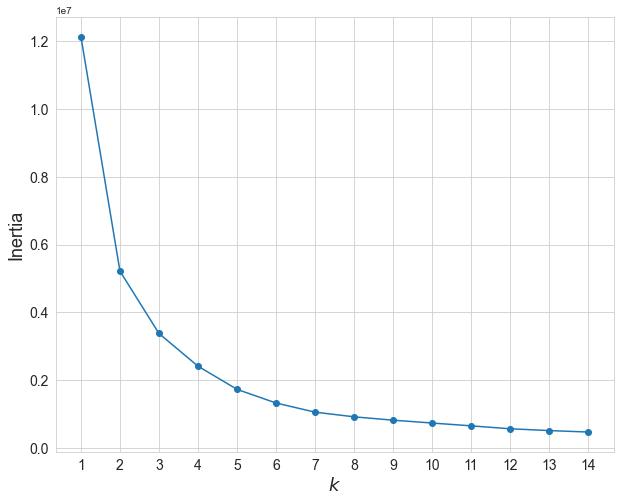

In [18]:
plt.figure(figsize=(10,8))

plt.plot(range(1,15), inertias, '-o')

plt.xlabel("$k$", fontsize=18)
plt.ylabel("Inertia", fontsize=18)

plt.xticks(range(1,15),fontsize=14)
plt.yticks(fontsize=14)

plt.show()

# Creating a new dataframe that contains the columns of rice_yields.csv except the column Year and, in addition, has the column Climate_cluster

In [19]:
rice_data = pd.DataFrame(Averages)

rice_data["KM5_clusterN_(maxT_growth_maxT_harvest)"] = Kmeans.labels_



rice_data.to_csv('../Final_data/rice_yield_KMeans_averaged.csv')


# The map of India based on the KMeans clustering 

In [20]:
import geopandas as gpd

In [21]:


# Read in shape file.
shp = gpd.read_file('../Final_data/districts2020.shp')


In [22]:
df = pd.read_csv('../Final_data/rice_yield_KMeans_averaged.csv')

In [23]:
# Set up a "cluster" column of NaNs.
shp['cluster'] = np.zeros(len(shp),dtype=int)*np.NaN

In [24]:
for i in range(len(df)):
    shp.loc[shp['distname']==df.iloc[i]['Dist Name'], 'KM5_clusterN_(maxT_growth_maxT_harvest)'] = int(df.iloc[i]['KM5_clusterN_(maxT_growth_maxT_harvest)'])

In [25]:
shp.sample(5, random_state=4000)

,objectid,statecode,statename,state_ut,distcode,distname,distarea,totalpopul,totalhh,totpopmale,totpopfema,st_areasha,st_lengths,geometry,cluster,KM5_clusterN_(maxT_growth_maxT_harvest)
152,103,23,Madhya Pradesh,STATE,434,Ratlam,4861.0,1455069.0,296683.0,738241.0,716828.0,5.804216e+09,581747.844983,"POLYGON ((74.59782 23.42723, 74.59818 23.42747...",NaN,3.0
443,647,33,Tamil Nadu,STATE,632,Coimbatore,4732.0,3458045.0,958035.0,1729297.0,1728748.0,4.897219e+09,514045.680355,"POLYGON ((76.85141 10.84584, 76.85064 10.84696...",NaN,5.0
64,54,01,Jammu & Kashmir,STATE,017,Ramban,1329.0,283713.0,55490.0,149132.0,134581.0,1.465391e+09,208471.413469,"POLYGON ((75.36832 33.10038, 75.36891 33.09905...",NaN,NaN
334,358,27,Maharashtra,STATE,520,Raigarh,7152.0,2634200.0,611790.0,1344345.0,1289855.0,7.788800e+09,730771.806596,"MULTIPOLYGON (((73.47458 19.13519, 73.47731 19...",NaN,2.0
80,606,09,Uttar Pradesh,STATE,164,Kanpur Nagar,3155.0,4581268.0,863338.0,2459806.0,2121462.0,3.628023e+09,464145.457855,"POLYGON ((79.95192 26.92077, 79.95171 26.92133...",NaN,3.0


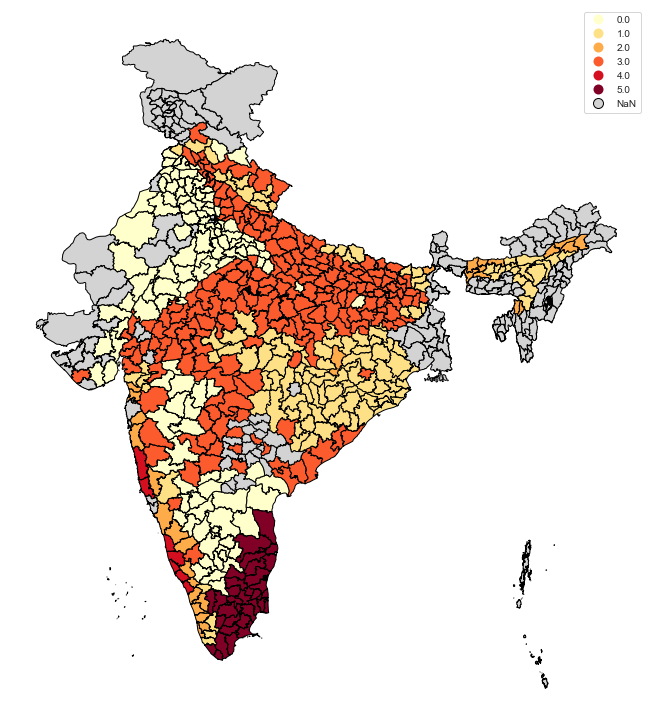

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10), constrained_layout=True)
# Show full map including NaNs.
shp.plot(ax=ax, column='KM5_clusterN_(maxT_growth_maxT_harvest)', edgecolor='black', cmap='YlOrRd', legend=True, categorical=True,
        missing_kwds={'color': 'lightgrey'})
       
noNaNs = shp.dropna().copy()
noNaNs.cluster = noNaNs['KM5_clusterN_(maxT_growth_maxT_harvest)'].astype(int)
legend_kwds =  dict(loc='upper right', fontsize=14) 
#noNaNs.plot(ax=ax, column='KM5_clusterN_(maxT_growth_maxT_harvest)', edgecolor='black', 
 #          cmap='YlOrRd', legend=True, categorical=True,
 #                 legend_kwds=legend_kwds)

# Hide axes.
ax.set_axis_off()
plt.show()